##                                            Project Code - PRCP-1000-ProtugeseBank

# BUSINESS CASE :- Create a predictive model which will help the bank marketing team to know which customer will buy the product.


### :::::::::: :::::::::: :::::::::: :::::::::: ::::::::::  Process of The Project  :::::::::: :::::::::: :::::::::: :::::::::: ::::::::::

                                - 1 . python Implementation
                                - 2 . Domain Analysis ,  Basic Checks & find Insights
                                - 3 . EDA (univariate , Bi-Variate ) and Find Insights
                                - 4 . Data Preprocessing / Feature engineering
                
                                                        - ( i ) . Find Missing values & impute them
                                                        - ( ii ) .  Convert Categorical variable to Numerical
                                                        - ( iii ) . Handle Outliers
                                                        - ( iv ) . Balance the df / SMOTE
                                        
                                - 5 . Feature Selection
                                                         - ( i ) . Check coorelation
                                                         - ( ii ) . Handle Duplicate Values
                                                         - ( iii ) . Create Dependent(y) & Independent(X) Variable
                                                    
                                - 6 . Model Creation  & Evaluation
                                        
                                                          - ( i ) . Splite Data into Train & Test
                                                          - ( ii ) . Import Matrics for evaluation
                                                          
                                                                        - ( a ) . Logistic regression
                                                                        - ( b ) . K Nearest Neighbour
                                                                        - ( c ) . Support Vector
                                                                        - ( d ) . Decision Tree
                                                                        - ( e ) . Random Forest
                                                                        - ( f ) . Gradient Boosting
                                                                        - ( g ) . XG - Boost
                                                                        - ( h ) . Artificial Neural Network
                                - 7 . Create Model Comarision Report
### ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

# 1 . Python Implementation

In [1]:
import pandas as pd                                                   # import pandas Library for data reading
import numpy as np                                                    # import numpy for numerical calculation
import seaborn as sns                                                 # import seaborn library for data visualisation
import ydata_profiling                       
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import warnings                                                       # import warnings is used to manage warning messages
import matplotlib.pyplot as plt                                       # import matplotlib for data visualization
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle                                                         # import pickle for save and load objects
from sklearn.pipeline import Pipeline
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("bank-additional-full.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# 2 . Domain Analysis and Basic Checks

- **Age** :- Age of Bank Customers.
- **Job** - What Type of job do Bank Customer.
- **Marital** - Maritial Status.
- **Education** - Education / Highest Qualification.
- **Default** - Customer has defaulted or not(make mistakes or not able to return loan).
- **housing** - Customer has House loan or Not.
- **loan** - customer has Personal Loan or Not.
- **Contact** - Communication Type.
- **Month** - Last Contact Month of the year.
- **day_of_week** - last contact day of week.
- **Duration** - last contact duration in seconds .
- **campaign** - number of contacts performed during this campaign and for this client.
- **pdays** - number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted).
- **previous** - number of contacts performed before this campaign and for this client.
- **poutcome** - outcome of the previous marketing Campaign.
- **emp.var.rate**- employment variation rate - quarterly indicator. 
- **cons.price.idx** - consumer price index - monthly indicator.
- **cons.conf.idx** - consumer confidence index - monthly indicator.
- **euribor3m** - euribor 3 month rate - daily indicator .
- **nr.employed** - number of employees - quarterly indicator.
- **y** - the client has subscribed a term deposit or not.

In [3]:
# to see first five records
df.head()

# but here all columns are not visible

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# to see all columns
pd.set_option('display.max_columns',None)
df.tail() # to see last 5 records

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
# to know about data type & null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# To get Statistical information about numerical columns
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Insights for Numerical  Datatype : --

- 1 . **Age :** The average age of customer is 40 and minimum age is 17 years, maximum age is 98 years.
- 2 . **Duration :** the average duration of customers of previous contact is 258 sec and ranges from 0 to 4918 second.
- 3 . **Campaign :** The Average Campaign done for each customer is 2.56 time where 1 time is minimun & 56 time is maximum.
- 4 . **Pdays :** This variable represents the number of days passed after the customer was last contacted in a previous campaign. A value of 999 indicates that the customer was not previously contacted and maximum customers not previously contacted.
- 5 . **Previous :** Previous indicates that how many previous campaigns conducted , here the mean is 0.17 time which is relatively low.

In [7]:
# To know statistical information about Categorical data
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


### Insights for Objective Datatype : -

- **Job :** Job has 12 unique values , in which admin job is most frequent with a frequency of 10422.
- **Maritial :** maritial has 4 unique values , in which 24928 customers have married.
- **Education :** Education has 8 unique lavels . The most frequent education level is "university degree" with a frequency of 12,168 .
- **Default :** Default has 3 unique values and 32588 customers have no Defaulted. 
- **Housing :** Housing has 3 unique categories in which 21576 customers having housing loan.
- **Loan :** Loan has 3 unique categories and 33950 customers having No Personal loan.
- **Contact :** Contact has done by 2 ways in which 26144 contacts have done by Cellular device.
- **Month :** The last contact month of the year have 10 different months but May month has top frequent of 13769 times.
- **day_of_week :** day_of_week is the last contact day of the week and 13769 customers have contacted on Thursday only from 5 unique Days.
- **poutcome :** poutcome has 3 unique categories , in which  The most frequent category is "nonexistent," indicating that most customers were not previously contacted. The frequency of the "nonexistent" category is 35,563 occurrences.
- **y :** y has two category.The most frequent category is "no," indicating that the majority of customers did not subscribe to the Term plan. The frequency of the "no" category is 36,548 occurrences.

# 3 . EDA : Exploratory Data Analysis

In [8]:
# use a for loop to find NoN Objective df type
df1 = []                         # create a empty List
for i in df.columns:             # use for loop in df.columns
    if df[i].dtype != 'O':       # use if condition
        df1.append(i)            # Append that columns which satisfy the if condition
print(df1)                       # print the List

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [9]:
# Select numerical columns
df1_columns = df.select_dtypes(include='number').columns
df1 = df[df1_columns]               # Numerical columns

# Select categorical columns
df2 = df.drop(df1_columns, axis=1)  # Categorical columns

### ( i ) . Univariate Analysis

## univariate analysis for Numerical Columns
plt.figure(figsize=(10,10))                                        # set the canvas size 
plotnumber = 1                                                     # create a variable for plotting numbers      
for i in df1 :                                                     # use for loop to iterate the loop
    plt.subplot(5,2,plotnumber)                                    # use subplot to plot figure in rows & columns
    sns.histplot(x = df1[i],color='grey',kde=True)                 # plot Histogram 
    plotnumber = plotnumber + 1
plt.tight_layout()                                                   # to avoid the overlapping

### Insightsof Numerical data  :--

- **Age -** The age between 30 - 40 has more Bank customer as compared to age > 60 years.
- **Duration -** More customers are contacted brtween 50 - 250 second and as the time duration increased the customers count get decreased.
- **campaign -** Approximately 80 % of customers are contacted between 1 - 3 times campaign.
- **pdays -** Approximately 96 % customers has not contacted from previous campaign .
- **Previous -** Previous graph shows that maximum customers has not contacted before this Campaign.
- **emp.var.rate , cons.price.idx , cons.conf.idx , euribor3m , nr.employed** are not normaly distributed.

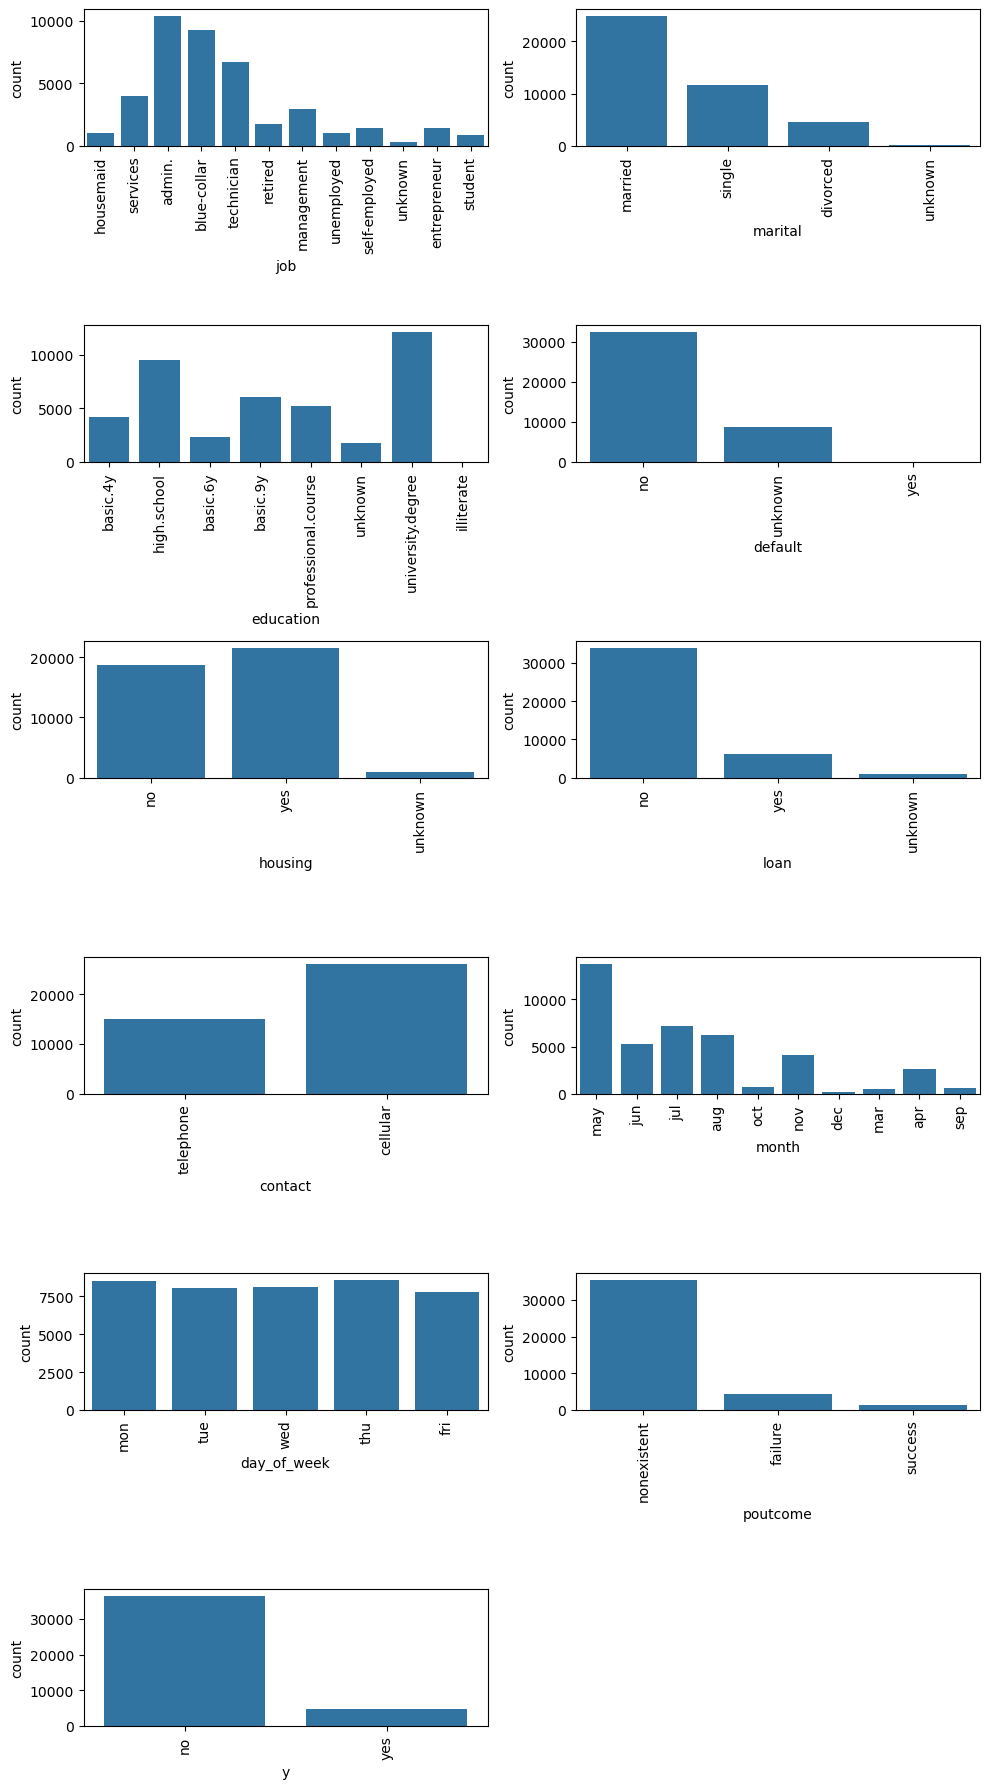

In [10]:
## univariate analysis for Categorical Columns
plt.figure(figsize=(10,18))                            # set the canvas size 
plotnumber = 1                                         # create a variable for plotting numbers      
for i in df2 :                                         # use for loop to iterate the loop
    plt.subplot(6,2,plotnumber)                        # use subplot to plot figure in rows & columns
    sns.countplot(x = df2[i])                          # plot countplot 
    plotnumber = plotnumber + 1
    plt.xticks(rotation=90)
plt.tight_layout()                                     # to avoid the overlapping 

### Insights Categorical Data :--

- **Job -** Approximately 70 % of customers are working in "Service" , "admin" , "blue-collar" & "technician" field.
- **Marital -** 60 % customers are married , 28 % are single , 11 % are divorced and 1 % are unknown.
- **Education -** 29.5 % customers have univercity degree , 23 % are high shool  , 10 % have professional course and remaining have 9y,6y,4y,unknown. but 15 - 16 customers are illiterate.
- **default -** 80 % customers has not defaulted but 20 % customers has defaulted(maked mistakes).
- **Housing -** 52 % customers has House loan , 45 % has not taken any house Loan and about 3 % customer is unknown.
- **Loan -** 82 % customers have not any personal loan , 15 % have personal loan & Remaining 3 % details is unknown.
- **contact -** 63.5 % customers have cellular type and remaining 36.5 % have telephone type contact.
- **Month -** more than 50 % customers are contacted only in "may" & "july" month.
- **day_of_week -** All customers are choose All weekdays in equal ratio.
- **Poutcome -** Only 3 % of campaign got success and 86 % is nonexistant.
- **Y -** only 11 % customers have Subscribed the banks Term plan.

### ( ii ) . Bivariate Analysis

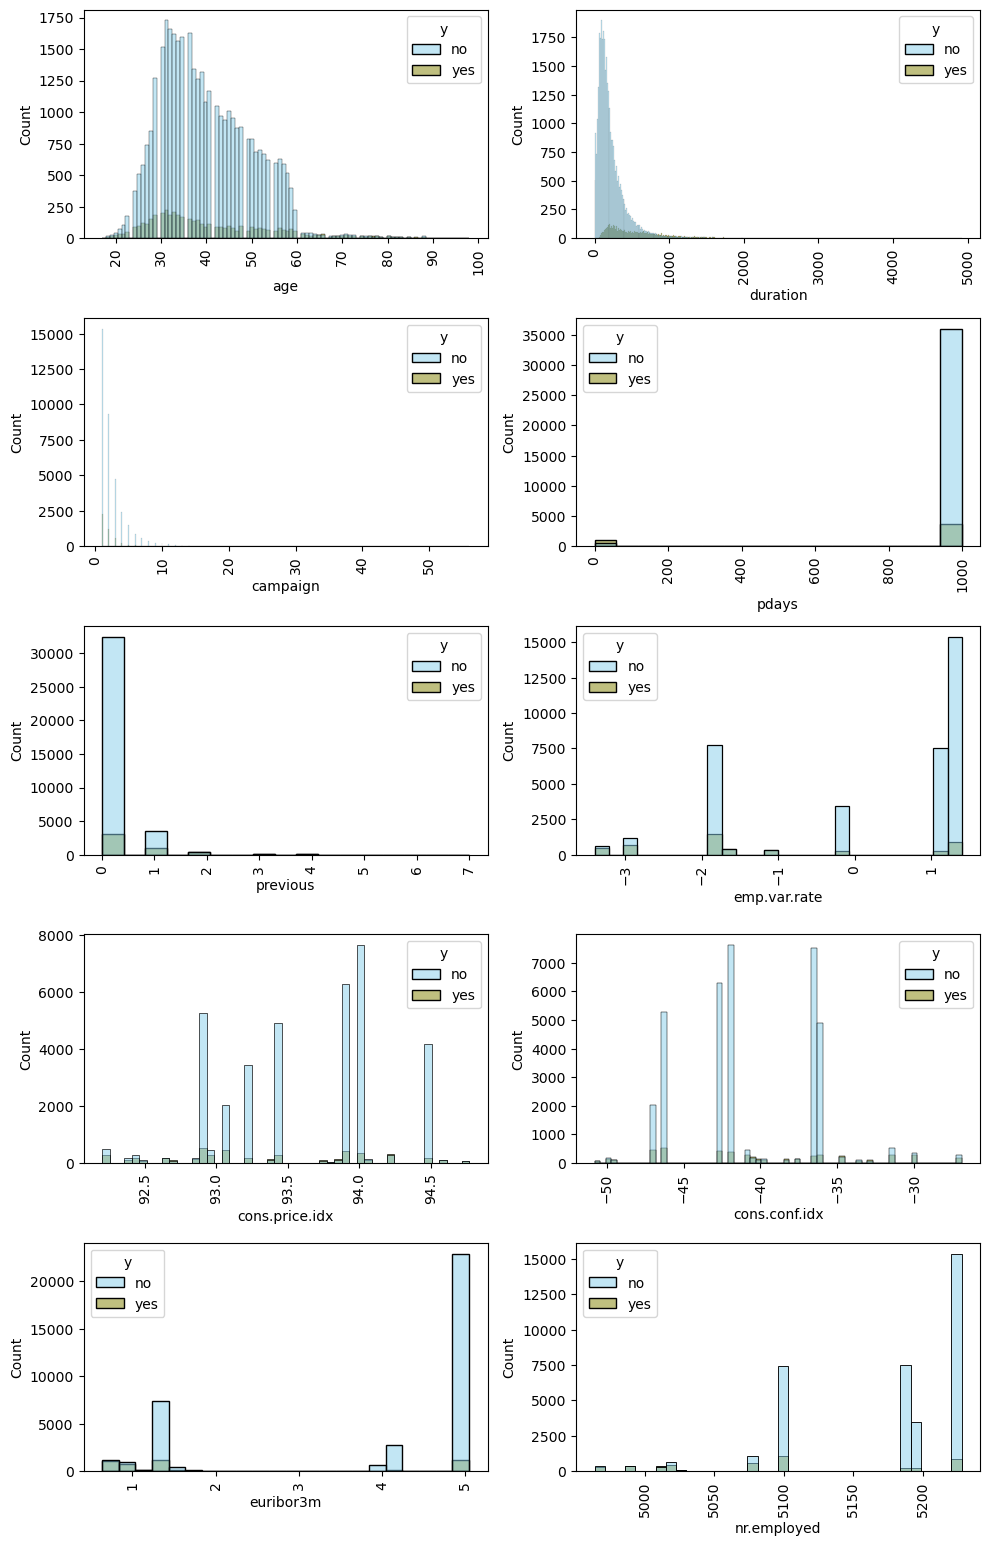

In [11]:
## Bivariate analysis for Numerical Columns
plt.figure(figsize=(10,18))                                         # set the canvas size 
plotnumber = 1                                                      # create a variable for plotting numbers      
for i in df1 :                                                      # use for loop to iterate the loop
    plt.subplot(6,2,plotnumber)                                     # use subplot to plot figure in rows & columns
    sns.histplot(x = df1[i],hue=df.y,palette=['skyblue', 'olive'])    # plot Histogram with Target
    plotnumber = plotnumber + 1
    plt.xticks(rotation=90)
plt.tight_layout()                                                  # to avoid the overlapping

### Insights of Numerical data with Target - 

- The Customers whos age lessthan 20 and graterthan 60 , they are more subscribed term plan.
- When Contact duration with Customers increases , the Subscription ratio also increases.
- The customers who are contacted with in 70 days from previous campaign,they are subscribed.
- Customers who are contacted more than 2 times from previous they are subscribed .

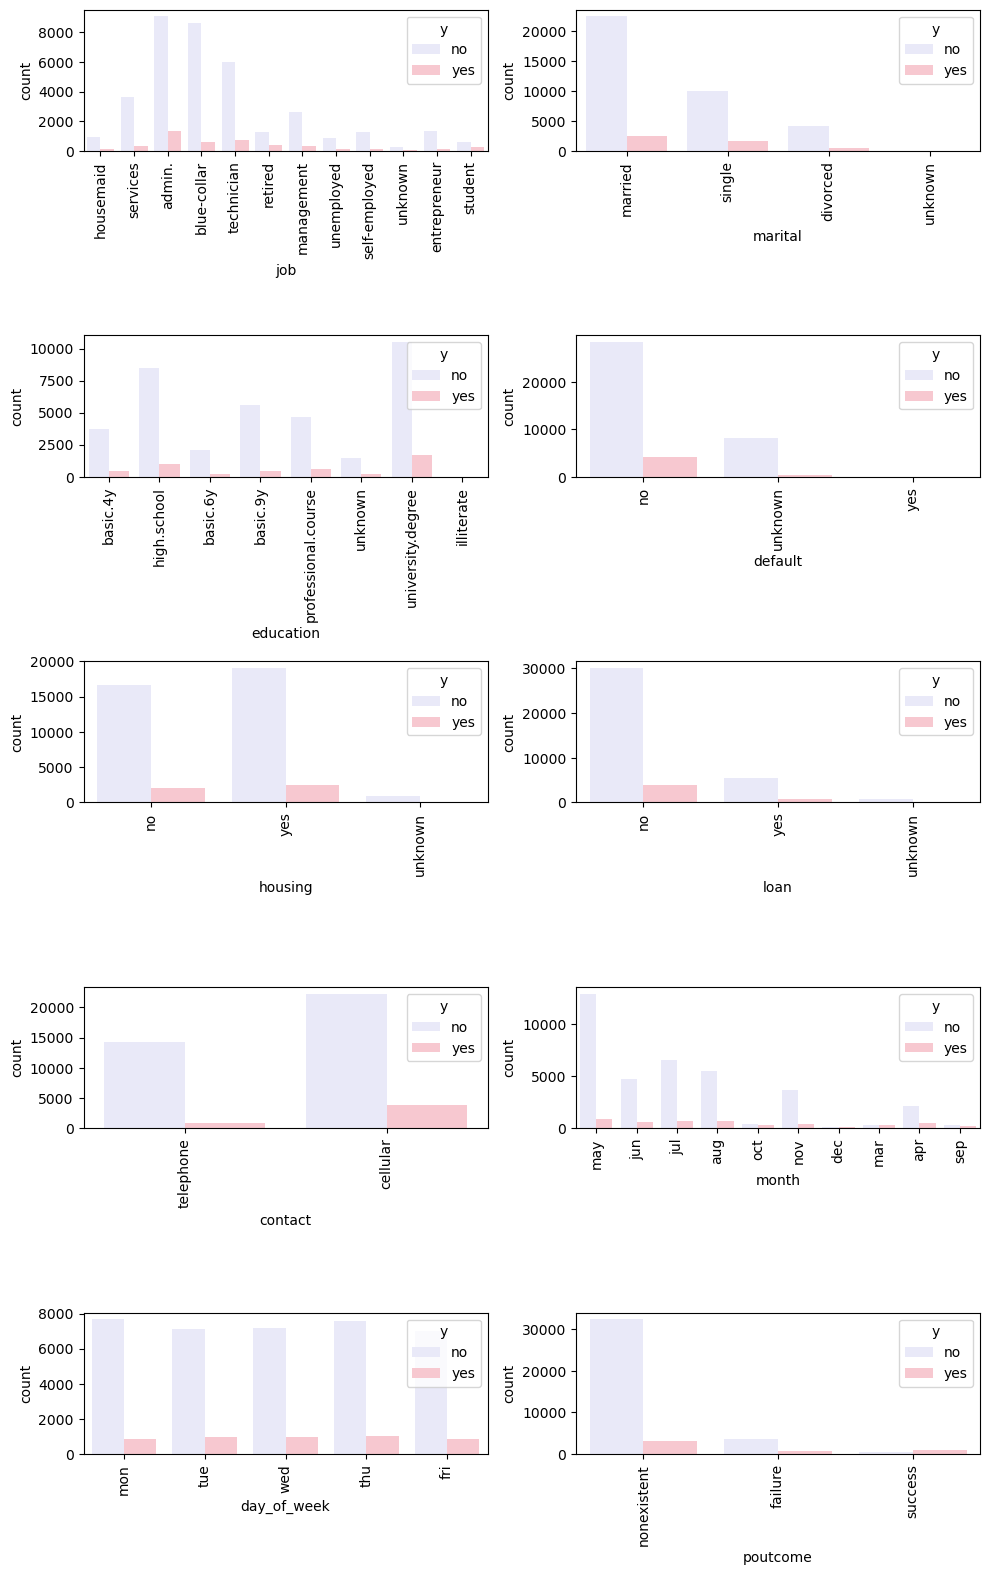

In [12]:
## Bivariate analysis for Categorical Columns
plt.figure(figsize=(10,18))                                         # set the canvas size 
plotnumber = 1                                                      # create a variable for plotting numbers      
for i in df2.drop('y',axis=1) :                                     # use for loop to iterate the loop
    plt.subplot(6,2,plotnumber)                                     # use subplot to plot figure in rows & columns
    sns.countplot(x = df2[i],hue=df.y,palette=['lavender', 'pink'])   # plot Countplot with Target class 
    plotnumber = plotnumber + 1
    plt.xticks(rotation=90)
plt.tight_layout()                                                  # to avoid the overlapping

### Insights of Categorical data with Target : -- 

- **Job -** Who are students they subscribed Term plan in high ratio but Blue - collar ratio subscription is to low as compared to other.
- **marital -** we can clearly see that merried persons subscription ratio is lowest but singles & unknown persons are subscribed this term plan.
- **Education -** Customer who are illiterate & have university Degree are subscribed term plans.
- **Defaults -** who have credit default they are not subscribed but only 13 % of no credit default has  subscribed.
- **Housing , Loan -** Plan Subscription is not dependent on Housing loan and Personal Loan having or not.
-  **Contact -** Customers who have Cellular Contact they are subscribed term plans.
- **Month -** Approximately 40 % - 50 % of customers who were Contacted in March ,Septmber , October , December month they subscribed term plan.
- **Day_of_week -** But Plan subscription is not depends on customers week of day,they subscribed in equal ratio for all days.
- **Poutcome -** More Customers of Succesful Outcomes are subscribed the Bank's Term Plan. 

### If the Bank will focus on these following , then Banks Subscription Ratio for Term Plan wii get Increased -

####    Lower Educated , who are Married , who have Telephone Communication and Need contact in March, September, October & December Month only.

# 4 . Data Preprocessing :

### ( i ) . Handle missing values :-

In [13]:
# see number of missing values present in each Features
df.isnull().sum()

### No missing values are present in it.

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### ( ii ) . Handle Categorical Variable :-

In [14]:
# print unique values of All Categorical data by using for loop.
for i in df2.keys() :
    print("★"*5,i,"★"*5,"\n")
    print(df[i].unique(),'\n')

★★★★★ job ★★★★★ 

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

★★★★★ marital ★★★★★ 

['married' 'single' 'divorced' 'unknown'] 

★★★★★ education ★★★★★ 

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

★★★★★ default ★★★★★ 

['no' 'unknown' 'yes'] 

★★★★★ housing ★★★★★ 

['no' 'yes' 'unknown'] 

★★★★★ loan ★★★★★ 

['no' 'yes' 'unknown'] 

★★★★★ contact ★★★★★ 

['telephone' 'cellular'] 

★★★★★ month ★★★★★ 

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

★★★★★ day_of_week ★★★★★ 

['mon' 'tue' 'wed' 'thu' 'fri'] 

★★★★★ poutcome ★★★★★ 

['nonexistent' 'failure' 'success'] 

★★★★★ y ★★★★★ 

['no' 'yes'] 



In [15]:
from sklearn.preprocessing import LabelEncoder      # import Label Encoder to Convert Catregorical data to Numerical
lc = LabelEncoder()                                 # Create a Label Encoder Variable

In [16]:
## Transfer Data From Categorical to Numerical by using Fit_transform method 

df['job']=lc.fit_transform(df['job'])
df['marital']=lc.fit_transform(df['marital'])
df['education']=lc.fit_transform(df['education'])
df['default']=lc.fit_transform(df['default'])
df['housing']=lc.fit_transform(df['housing'])
df['loan']=lc.fit_transform(df['loan'])
df['contact']=lc.fit_transform(df['contact'])
df['month']=lc.fit_transform(df['month'])
df['day_of_week']=lc.fit_transform(df['day_of_week'])
df['poutcome']=lc.fit_transform(df['poutcome'])
df['y']=lc.fit_transform(df['y'])

In [17]:
# CHECK DATA IS TRANSFORMED OR NOT
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### ( iii )  .  Handle Outlier :-

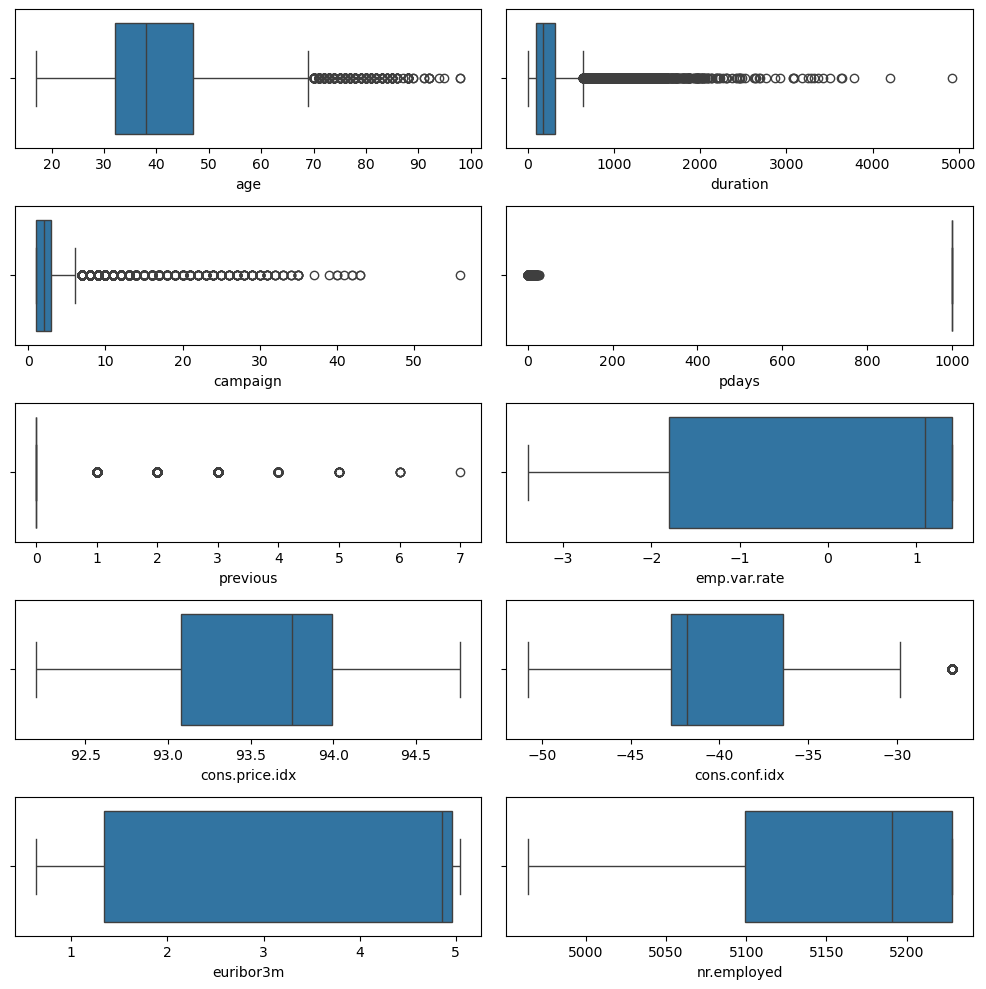

In [18]:
# outlier checking

plt.figure(figsize=(10,10))         # canvas size
plotnumber = 1                      # variable
for i in df1:                     # use for loop
    plt.subplot(5,2,plotnumber)     # set number of rows & columns
    sns.boxplot(x=df1[i])           # use Box-plot to see outlier
    plotnumber = plotnumber + 1
plt.tight_layout()                  # to ignore overlapping

In [19]:
## Handle Outliers By Box Plot Visualisation
df.loc[df['age']>90,'age'] = df.age.median()
df.loc[df['duration']>3000,'duration'] = df.duration.median()
df.loc[df['campaign'] > 35,'campaign'] = df.campaign.median()
df.loc[df['cons.conf.idx'] >-30,'cons.conf.idx'] = df['cons.conf.idx'].median()

### ( iv ) .  SMOTE  ( Data Balancing ) :-

In [20]:
# calculate the Target Class
df['y'].value_counts()

# we can Clearly see that the Target Class is Not Balanced , so we do Data Balance By SMOTE method

y
0    36548
1     4640
Name: count, dtype: int64

In [21]:
# Create X & Y Variable for SMOTE
X = df.drop('y',axis=1)
Y = df['y']

# 5 . Feature Selection

### ( i ) . Check Co-rellation

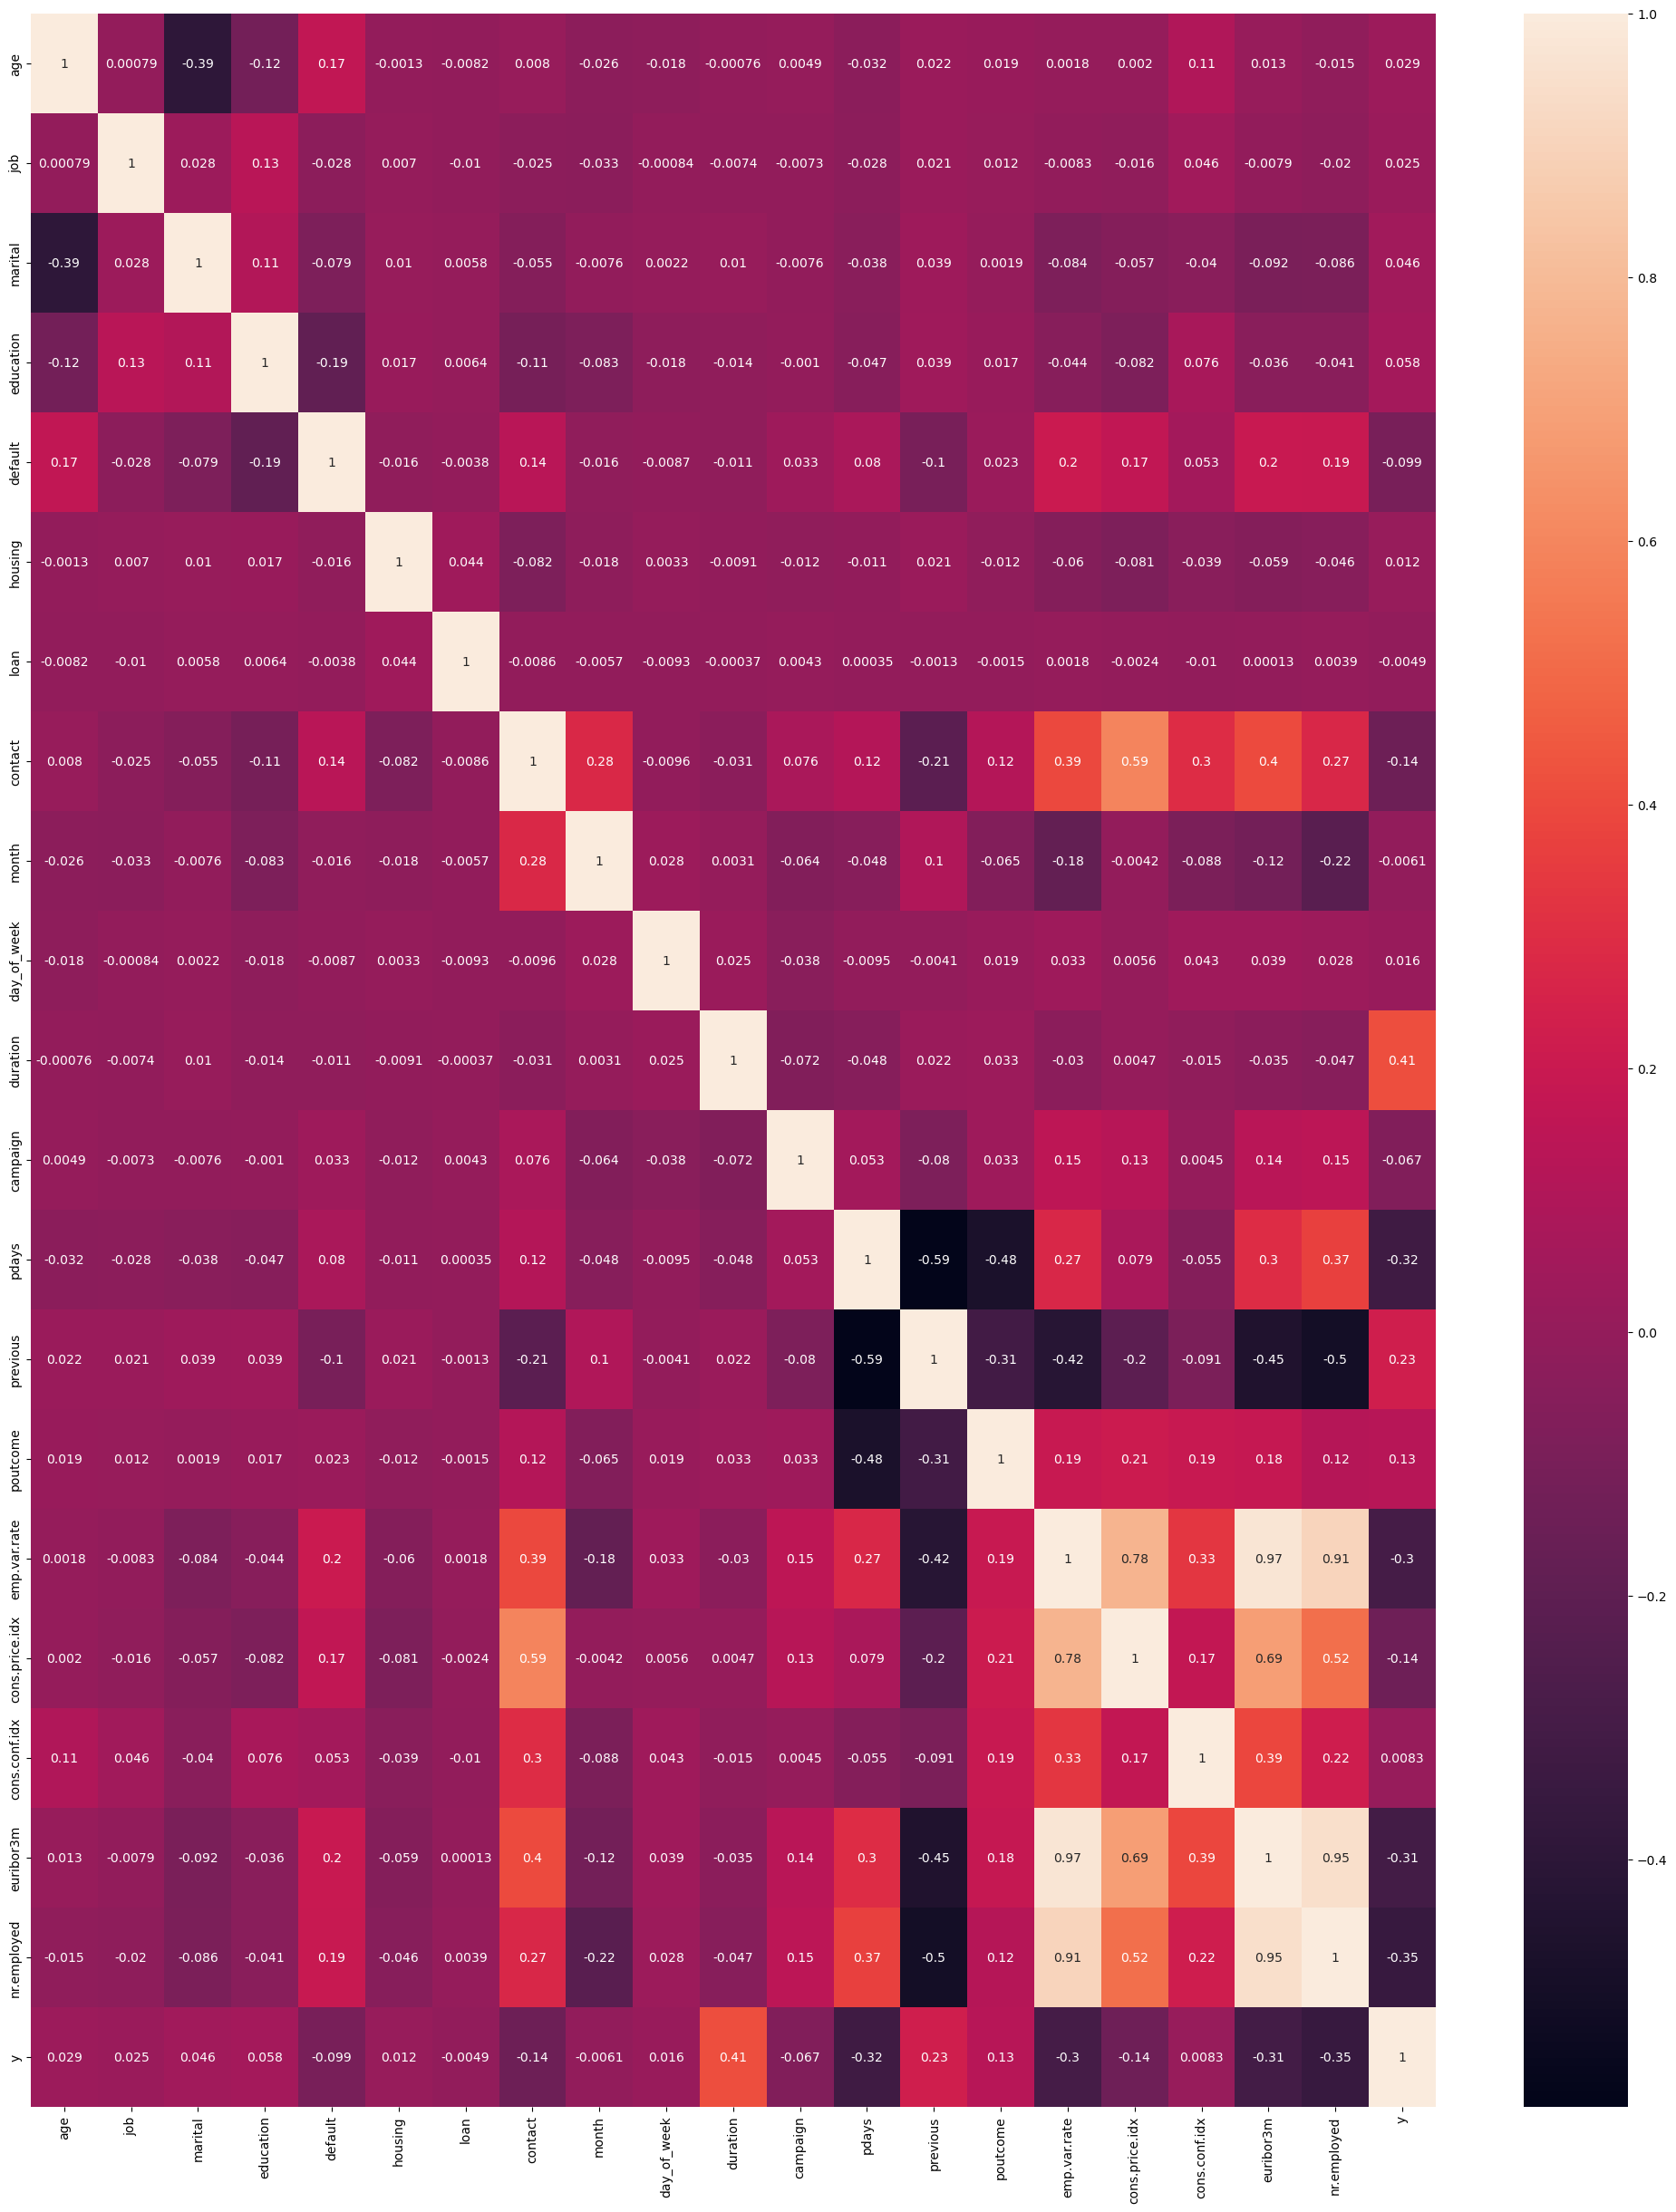

In [22]:
# check the co-relation between each variable and with target class.
plt.figure(figsize=(25,30))                                      # set the Canvas size
sns.heatmap(df.corr(),annot=True)                                # plot heat map for co-relation
plt.show()

###  found that  'emp.var.rate' , 'nr.employed'& 'euribor3m' are highly corelated with each other , 
### so we can remove anyt two of them.

### ( ii ) . Handle Duplicate Values

In [23]:
# find Duplicate values 
df.duplicated().sum()

12

In [24]:
# Drop The Duplicate Values
df = df.drop_duplicates()

### ( iii ) . Create X and Y


In [25]:
# create dependent and independent variable
X = df.drop(['y','euribor3m','nr.employed'],axis=1)    # Independent Variable
y = df['y']  

In [26]:
y.value_counts()

y
0    36537
1     4639
Name: count, dtype: int64

# 6  .  Model Creation & Evaluation

In [27]:
# split the data into train & test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15)

# import Required metrics to see the performance
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score

## ( i ) . LOGISTIC REGRESSION 

In [28]:
# create Linear Model
from sklearn.linear_model import LogisticRegression        # import Logistic regression from Linear model
log = LogisticRegression(random_state=15)                                 # Create a variable of Logistic regression
log.fit(x_train,y_train)                                   # Fit the Model into train data
y_pr_log = log.predict(x_test)                             # Predict the x_test values as y_pr_log

acc_log = accuracy_score(y_test,y_pr_log)                  # Calculate Accuracy Score
acc_log

0.907309965190642

In [29]:
# print Accuracy Score for Training Data
y_pr_tr=log.predict(x_train)
acc_lr_trin = accuracy_score(y_train,y_pr_tr)
acc_lr_trin

0.9062207265031399

In [30]:
print(classification_report(y_test,y_pr_log))       # classification report

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10995
           1       0.63      0.38      0.48      1358

    accuracy                           0.91     12353
   macro avg       0.78      0.68      0.71     12353
weighted avg       0.89      0.91      0.90     12353



In [31]:
print("Precission Score : " ,precision_score(y_test,y_pr_log))
print("recall_score : " ,recall_score(y_test,y_pr_log))
print("f1_score : " ,f1_score(y_test,y_pr_log))

Precission Score :  0.6284680337756333
recall_score :  0.38365243004418265
f1_score :  0.4764517604023777


 ## ( ii ) . K - NEAREST NEIGHBOUR ( KNN )

In [32]:
from sklearn.neighbors import KNeighborsClassifier                 # from scikit-learn import KNeighborsClassifier

## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []
for i in range(1,11):                             # start of loop from 1- to 10
    knn = KNeighborsClassifier(n_neighbors=i)     # object creation
    knn.fit(x_train,y_train)                      # x_train for distance   And y_train used for getting estimate from neighbour
    pred_i = knn.predict(x_test)                  # obtain estimates for i neighbours
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

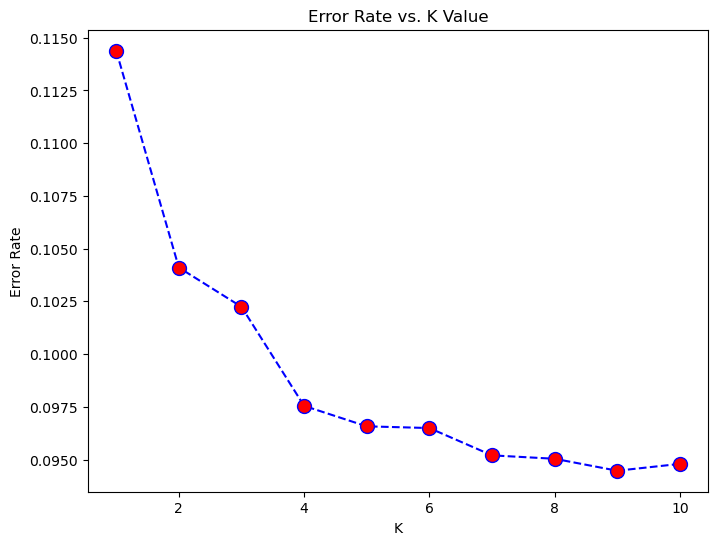

In [33]:
# Lets plot the k-value and error rate

plt.figure(figsize=(8,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
from sklearn.neighbors import KNeighborsClassifier    # import KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)             # Create a Variable of KNN
knn.fit(x_train,y_train)                              # fit model on Training Data
y_pr_knn = knn.predict(x_test)                        # predict the x_test
acc_knn = accuracy_score(y_test,y_pr_knn)             # Calculate Accuracy
acc_knn

0.9034242694082409

# Hyperparameter

In [35]:
from sklearn.model_selection import GridSearchCV    # import Grid Search cv from Sklearn.model_selevction

# Hyperparameter Tuning defining
hyperpara = [{'n_neighbors':[2,3,4,5,6,7,8,9,10],'weights':['distance','uniform']}]   # define n_neighbors & weights values
grid = GridSearchCV(estimator = KNeighborsClassifier(),param_grid = hyperpara,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)                     # fit the model

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['distance', 'uniform']}],
             scoring='accuracy')

In [36]:
grid.best_params_

{'n_neighbors': 8, 'weights': 'uniform'}

In [37]:
Knn_smote = KNeighborsClassifier(n_neighbors=5,weights="distance")    # make a variable for KNeighborsClassifier
Knn_smote.fit(x_train,y_train)                            # fit the model
Y_prd_knn_hyp = grid.predict(x_test)
acc_knn_hyp = accuracy_score(y_test,Y_prd_knn_hyp)   # finding accuracy
acc_knn_hyp

0.904962357322108

## ( iii ) . SUPPORT VECTOR CLASSIFIER

In [38]:
from sklearn.svm import SVC # import Support vector Classifier
svm = SVC(random_state=42)                                     # Create a variable of support Vector
svm.fit(x_train,y_train)                        # fit suppoprt vector on yraining Data
y_pr_svm = svm.predict(x_test)                  # Predict x_test
acc_svm = accuracy_score(y_test,y_pr_svm)       # Calculate Accuracy
acc_svm

0.9043956933538412

## Hyperparameter Tunning For SVC

In [ ]:
from sklearn.model_selection import GridSearchCV      # import Gridsearch 
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf','linear']} 
  
svm_grid = GridSearchCV(SVC(random_state=42), param_grid, refit = True,verbose = 3,scoring='accuracy',cv=3,n_jobs=-1) # define Grid 
  
# fitting the model for grid search
svm_grid.fit(x_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [39]:
svm_hyp =SVC(C=10, gamma=0.001,random_state=42,kernel='rbf')   # Create a variable of support Vector
svm_hyp.fit(x_train,y_train)                        # fit suppoprt vector on yraining Data
y_hyp_svm = svm_hyp.predict(x_test)                  # Predict x_test
acc_hyp_svm = accuracy_score(y_test,y_hyp_svm)       # Calculate Accuracy
acc_hyp_svm

0.9105480450093095

## ( iv ) . DECISION TREE

In [40]:
from sklearn.tree import DecisionTreeClassifier              # import Decision tree classifier            
d_tree = DecisionTreeClassifier(random_state=42)                            # Make a variable of decision tree
d_tree.fit(x_train,y_train)                                  # Fit the decision tree model on training data

y_pr_dtree = d_tree.predict(x_test)                          #  Predict x_test
acc_dtree = accuracy_score(y_test,y_pr_dtree)                # Check Model performance
acc_dtree

0.8844005504735691

### Hyperparameter Tunning for DTree.

In [42]:
from sklearn.model_selection import GridSearchCV    # import GridsearchCV

#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"),     #quality of split
    "splitter":("best", "random"),       # searches the features for a split
    "max_depth":(list(range(1, 20))),    #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],       #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}

tree = DecisionTreeClassifier(random_state=4)   #object creation for decision tree 
tree_cv = GridSearchCV(tree, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

tree_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 2, 'splitter': 'best'})


In [43]:
tree_cv.best_score_

0.9102452298159754

In [44]:
tree_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=9,
                       random_state=4)

In [45]:
#passing best parameter to decision tree
dtree_hyp=DecisionTreeClassifier(criterion='entropy',max_depth=19,min_samples_leaf= 1,min_samples_split=2,splitter='best',random_state=4)
dtree_hyp.fit(x_train,y_train)                  #traing model with best parameter
y_hyp_tree=dtree_hyp.predict(x_test)            #predicting
acc_hyp_tree=accuracy_score(y_test,y_hyp_tree)  #checking accuracy
acc_hyp_tree

0.8922528940338379

## ( v ) . RANDOM FOREST

In [46]:
from sklearn.ensemble import RandomForestClassifier    # import Random forest classifier
r_forest = RandomForestClassifier(random_state=4)      # create a Random Forest Classifier variable
r_forest.fit(x_train,y_train)                          # Fit the Random forest on Training Data
y_pr_for = r_forest.predict(x_test)                    # predict x_test
acc_rfor = accuracy_score(y_test,y_pr_for)             # Check Performance
acc_rfor

0.9146765967781105

### Hyperparameter for Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV    # import random search 

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]  # List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']                          # maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]                  # List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]               # minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]                 # minimum number of samples required to be at a leaf node.
bootstrap = [True, False]                    # sampling 

# dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)     # model creating 

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)


rf_cv.fit(x_train, y_train)                    ## training data on randomsearch cv
rf_best_params = rf_cv.best_params_            ## it will give you best parameters 
print(f"Best paramters: {rf_best_params})")    ## printing  best parameters
 

In [53]:
from sklearn.ensemble import RandomForestClassifier    # import Random forest classifier
r_for = RandomForestClassifier(n_estimators=180, max_features='sqrt', max_depth=25, min_samples_split=5, min_samples_leaf=5, n_jobs=-1, bootstrap=False)      # create a Random Forest Classifier variable
r_for.fit(x_train,y_train)                             # Fit the Random forest on Training Data
y_hyp_for = r_for.predict(x_test)                      # predict x_test
acc_rfor_hyp = accuracy_score(y_test,y_hyp_for)         # Check Performance
acc_rfor_hyp

0.9156480207237109

## ( vi )  . GRADIENT BOOSTING

In [54]:
from sklearn.ensemble import GradientBoostingClassifier     ## importing the model library
gbm=GradientBoostingClassifier()                            ## object creation
gbm.fit(x_train,y_train)                                    ## fitting the data
y_gbm=gbm.predict(x_test)                                   ##predicting the x_test
acc_gb=accuracy_score(y_test,y_gbm)
acc_gb

0.916133732696511

## ( vii ) . XG - BOOST

In [55]:
## Installing XGB library
!pip install xgboost

In [56]:
## model creation
from xgboost import XGBClassifier                #importing the model library
xgb_c=XGBClassifier()                            ## object creation
xgb_c.fit(x_train,y_train)                       # fitting the data
y_xgb=xgb_c.predict(x_test)                      #predicting the class
acc_xgb = accuracy_score(y_test,y_xgb)
acc_xgb

0.9125718448959766

### Hyperparameter Tunning for XGB - Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='accuracy',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
                        
rcv.fit(x_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

In [57]:
XGB2=XGBClassifier(reg_lambda= 12.8, reg_alpha= 0.1, n_estimators=150, max_depth=5, learning_rate=0.1, gamma=0.8)
XGB2.fit(x_train, y_train)                                #training / fitting
y_hyp_xgb=XGB2.predict(x_test)                            #testing
acc_hyp_xgb=accuracy_score(y_test,y_hyp_xgb)              #checking performance
acc_hyp_xgb

0.9170242046466446

## ( viii ) . Artificial Neural Network

In [58]:
## model creation
from sklearn.neural_network import MLPClassifier      # import Neural network
ann = MLPClassifier(random_state=4)                ## model object creation max_iter=Stopping parameter
ann.fit(x_train,y_train)                            ## training the data

y_pr_ann = ann.predict(x_test)                     ## predict target

acc_ann = accuracy_score(y_test,y_pr_ann)            ## Check performance
acc_ann 

0.8988100056666397

#   _______ MODEL CONPARISION REPORT_______

In [59]:
Results = pd.DataFrame({'model':['Log_Regression','K_nearest','Support vector','Decision tree',
                          'Random Forest','Gradient Boost','XG - Boost','Artificial Network'],
              
              
             'Test Accuracy':[acc_log,acc_knn,acc_svm,acc_dtree,acc_rfor,acc_gb,acc_xgb,acc_ann],
              
             'HyperParameter':['not available',acc_knn_hyp,acc_hyp_svm,acc_hyp_tree,
                               acc_rfor_hyp,'not available',acc_hyp_xgb,'not available'],
              
              'F1  score':[f1_score(y_test,y_pr_log),f1_score(y_test,y_pr_knn),f1_score(y_test,y_pr_svm),
                          f1_score(y_test,y_pr_dtree),f1_score(y_test,y_pr_for),f1_score(y_test,y_gbm),
                          f1_score(y_test,y_xgb),f1_score(y_test,y_pr_ann)]
             })



In [60]:
Results

,model,Test Accuracy,HyperParameter,F1 score
0,Log_Regression,0.907310,not available,0.476452
1,K_nearest,0.903424,0.904962,0.456987
2,Support vector,0.904396,0.910548,0.389664
3,Decision tree,0.884401,0.892253,0.492537
4,Random Forest,0.914677,0.915648,0.561564
5,Gradient Boost,0.916134,not available,0.558773
6,XG - Boost,0.912572,0.917024,0.567654
7,Artificial Network,0.898810,not available,0.602670


# ----- CONCLUSION -----

The **Random Forest** model achieved the highest test **accuracy (94.84 %)** among all models, followed closely by XGBoost & Decision Tree with a test accuracy of 94 % & 92 % respectively. The **Random Forest** model also had the highest **F1 score (94.90 %)**, indicating its overall **good performance** in terms of precision and recall. K_Nearest Neighbour, Decision Tree, and Gradient Boosting & XG - Boost also performed reasonably well with F1 scores above 90 % .

So that why i am prefering **Random forest** .